In [1]:
import altair as alt
import numpy as np
from bayes_window import models, fake_spikes_explore, BayesWindow, BayesRegression, LMERegression
from bayes_window.generative_models import generate_fake_spikes

alt.data_transformers.disable_max_rows()
try:
    alt.renderers.enable('altair_saver', fmts=['png'])
except Exception:
    pass

In [2]:

df, df_monster, index_cols, firing_rates = generate_fake_spikes(n_trials=20,
                                                                n_neurons=6,
                                                                n_mice=3,
                                                                dur=5,
                                                                mouse_response_slope=40,
                                                                overall_stim_response_strength=5)


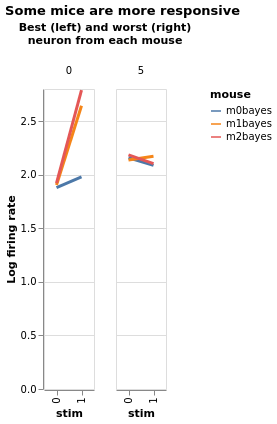

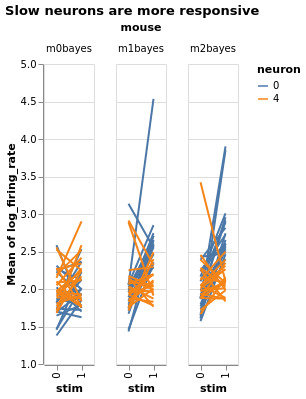

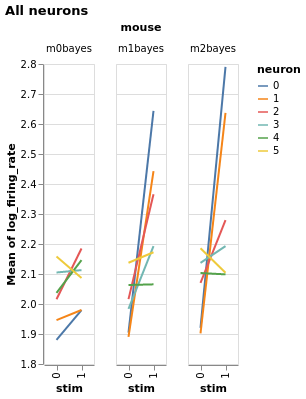

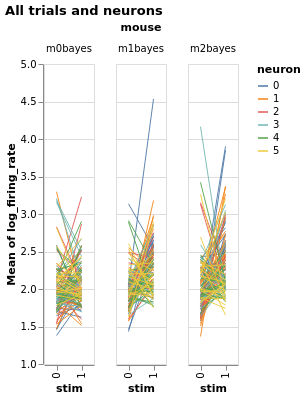

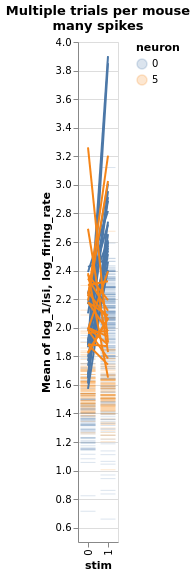

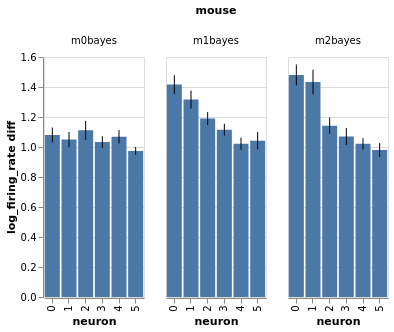

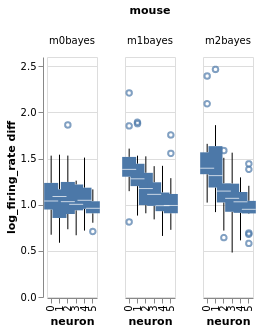

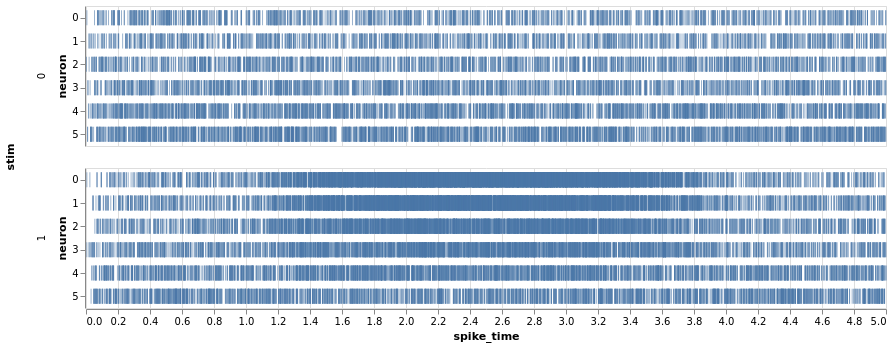

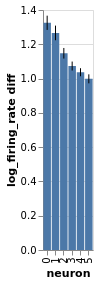

In [3]:

charts = fake_spikes_explore(df=df, df_monster=df_monster, index_cols=index_cols)
[chart.display() for chart in charts];
#fig_mice, fig_select, fig_neurons, fig_trials, fig_isi + fig_overlay, bar, box, fig_raster, bar_combined

In [4]:
df['log_isi'] = np.log10(df['isi'])

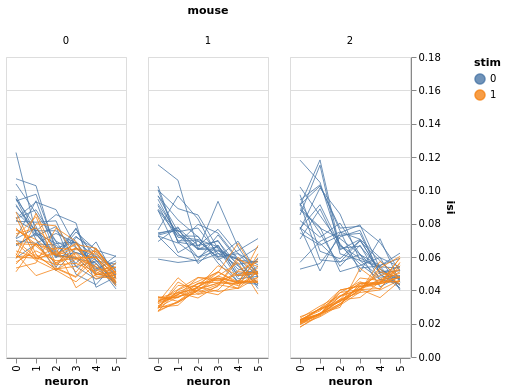

In [5]:
bw = BayesWindow(df_monster, y='isi', treatment='stim', condition=['neuron', 'mouse'], group='mouse')
bw.plot(x='neuron', color='stim', detail='i_trial', add_box=False).facet(column='mouse', )

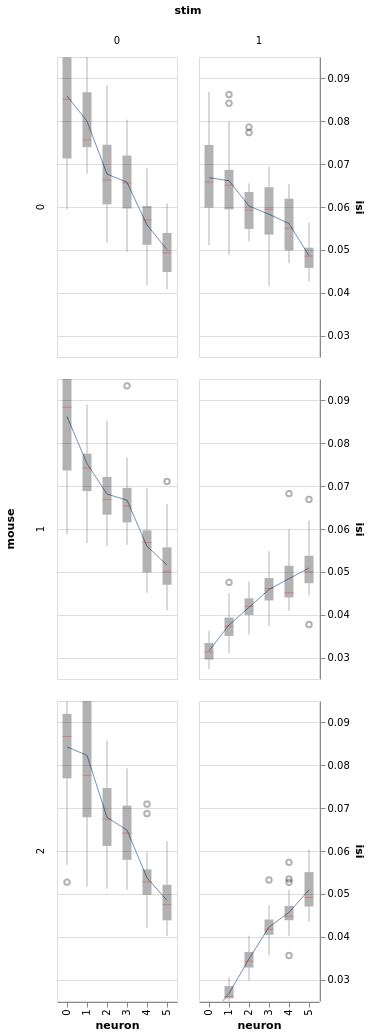

In [6]:
bw = BayesWindow(df=df, y='isi', treatment='stim', condition=['neuron', 'mouse'], group='mouse')
bw.plot(x='neuron', add_box=True).facet(row='mouse', column='stim')

2021-11-25 00:49:34.852136: E external/org_tensorflow/tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2021-11-25 00:49:34.852268: E external/org_tensorflow/tensorflow/stream_executor/cuda/cuda_diagnostics.cc:313] kernel version 450.142.0 does not match DSO version 450.156.0 -- cannot find working devices in this configuration


n(Divergences) = 1


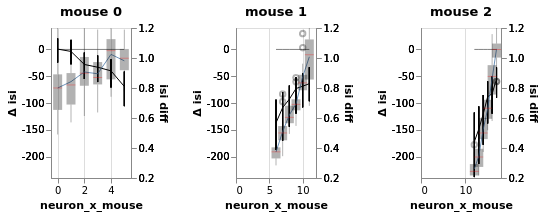

In [7]:
bw = BayesRegression(df=df, y='isi', treatment='stim', condition=['neuron_x_mouse'], group='mouse', detail='i_trial')
bw.fit(model=(models.model_hierarchical),
       do_make_change='divide',
       dist_y='normal',
       )

bw.chart

n(Divergences) = 1


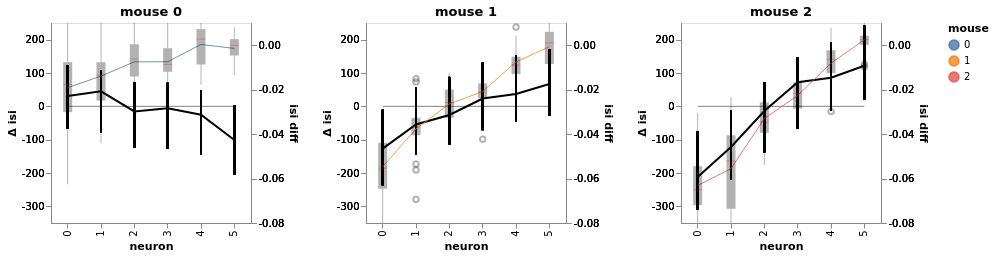

In [8]:
bw = BayesRegression(df=df, y='isi', treatment='stim', condition=['neuron', 'mouse'], group='mouse', detail='i_trial')
bw.fit(model=models.model_hierarchical,
       do_make_change='subtract',
       dist_y='gamma',
       add_group_intercept=True,
       add_group_slope=True,
       fold_change_index_cols=('stim', 'mouse', 'neuron', 'neuron_x_mouse', 'i_trial'))

bw.plot(x='neuron', color='mouse', independent_axes=True, finalize=True)

bw.facet(column='mouse', width=200, height=200).display()

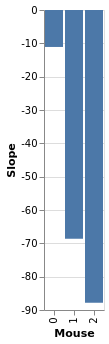

In [9]:
import altair as alt

slopes = bw.trace.posterior['slope_per_group'].mean(['chain', 'draw']).to_dataframe().reset_index()
chart_slopes = alt.Chart(slopes).mark_bar().encode(
    x=alt.X('mouse_:O', title='Mouse'),
    y=alt.Y('slope_per_group', title='Slope')
)
chart_slopes

In [10]:
bw = LMERegression(df=df, y='firing_rate', treatment='stim', condition='neuron_x_mouse', group='mouse', )
#bw.fit_anova()
bw.fit()

Using formula firing_rate ~ (1|mouse) + stim| neuron_x_mouse__0 + stim|neuron_x_mouse__1 + stim|neuron_x_mouse__2 + stim|neuron_x_mouse__3 + stim|neuron_x_mouse__4 + stim|neuron_x_mouse__5 + stim|neuron_x_mouse__6 + stim|neuron_x_mouse__7 + stim|neuron_x_mouse__8 + stim|neuron_x_mouse__9 + stim|neuron_x_mouse__10 + stim|neuron_x_mouse__11 + stim|neuron_x_mouse__12 + stim|neuron_x_mouse__13 + stim|neuron_x_mouse__14 + stim|neuron_x_mouse__15 + stim|neuron_x_mouse__16 + stim|neuron_x_mouse__17
                               Coef. Std.Err.       z  P>|z|    [0.025  \
Intercept                    106.728  316.270   0.337  0.736  -513.150   
1 | mouse                     48.910  164.553   0.297  0.766  -273.608   
stim | neuron_x_mouse__0      86.929  339.810   0.256  0.798  -579.086   
stim | neuron_x_mouse__1     167.872  339.810   0.494  0.621  -498.144   
stim | neuron_x_mouse__2     124.871  339.810   0.367  0.713  -541.144   
stim | neuron_x_mouse__3     289.665  339.810   0.852  0.39

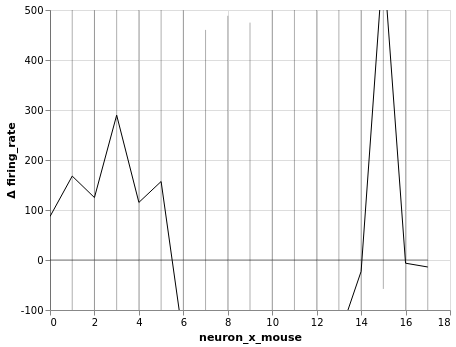

In [11]:
bw.plot(x='neuron_x_mouse:O')

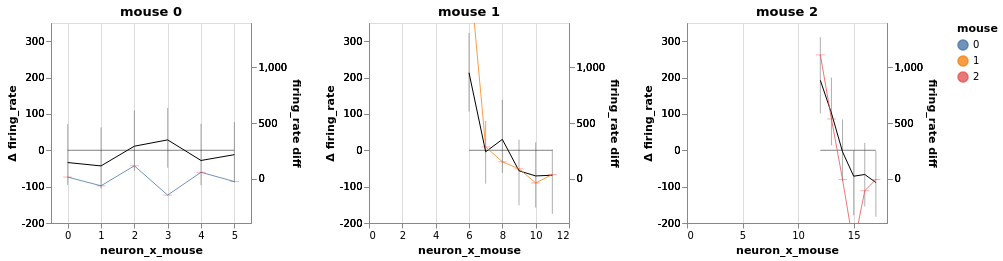

In [12]:
bw = BayesRegression(df=df, y='firing_rate', treatment='stim', condition='neuron_x_mouse', group='mouse')
bw.fit(model=models.model_hierarchical, do_make_change='subtract',
       progress_bar=False,
       dist_y='student',
       add_group_slope=True, add_group_intercept=False,
       fold_change_index_cols=('stim', 'mouse', 'neuron', 'neuron_x_mouse'))

bw.plot(x='neuron', color='mouse', independent_axes=True, finalize=True)
bw.facet(column='mouse', width=200, height=200).display()

In [13]:
bw = LMERegression(df=df, y='firing_rate', treatment='stim', condition='neuron_x_mouse', group='mouse')

bw.fit(formula='firing_rate ~ stim+ mouse + stim*mouse + neuron_x_mouse + stim * neuron_x_mouse');

Using formula firing_rate ~ stim+ mouse + stim*mouse + neuron_x_mouse + stim * neuron_x_mouse
                        Coef. Std.Err.       z  P>|z|    [0.025    0.975]
Intercept              77.712  163.910   0.474  0.635  -243.547   398.970
stim                  548.607  231.804   2.367  0.018    94.278  1002.935
mouse                 -77.367  283.026  -0.273  0.785  -632.089   477.354
stim:mouse           1151.346  400.260   2.876  0.004   366.851  1935.841
neuron_x_mouse         23.377   44.542   0.525  0.600   -63.924   110.678
stim:neuron_x_mouse  -178.392   62.992  -2.832  0.005  -301.854   -54.930
Group Var               0.001                                            


/home/m/env_jb1/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/m/env_jb1/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


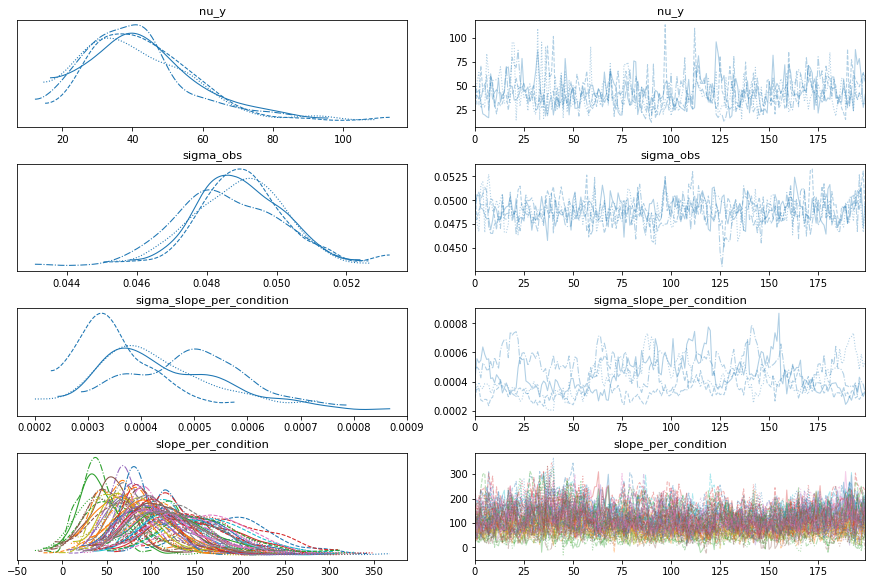

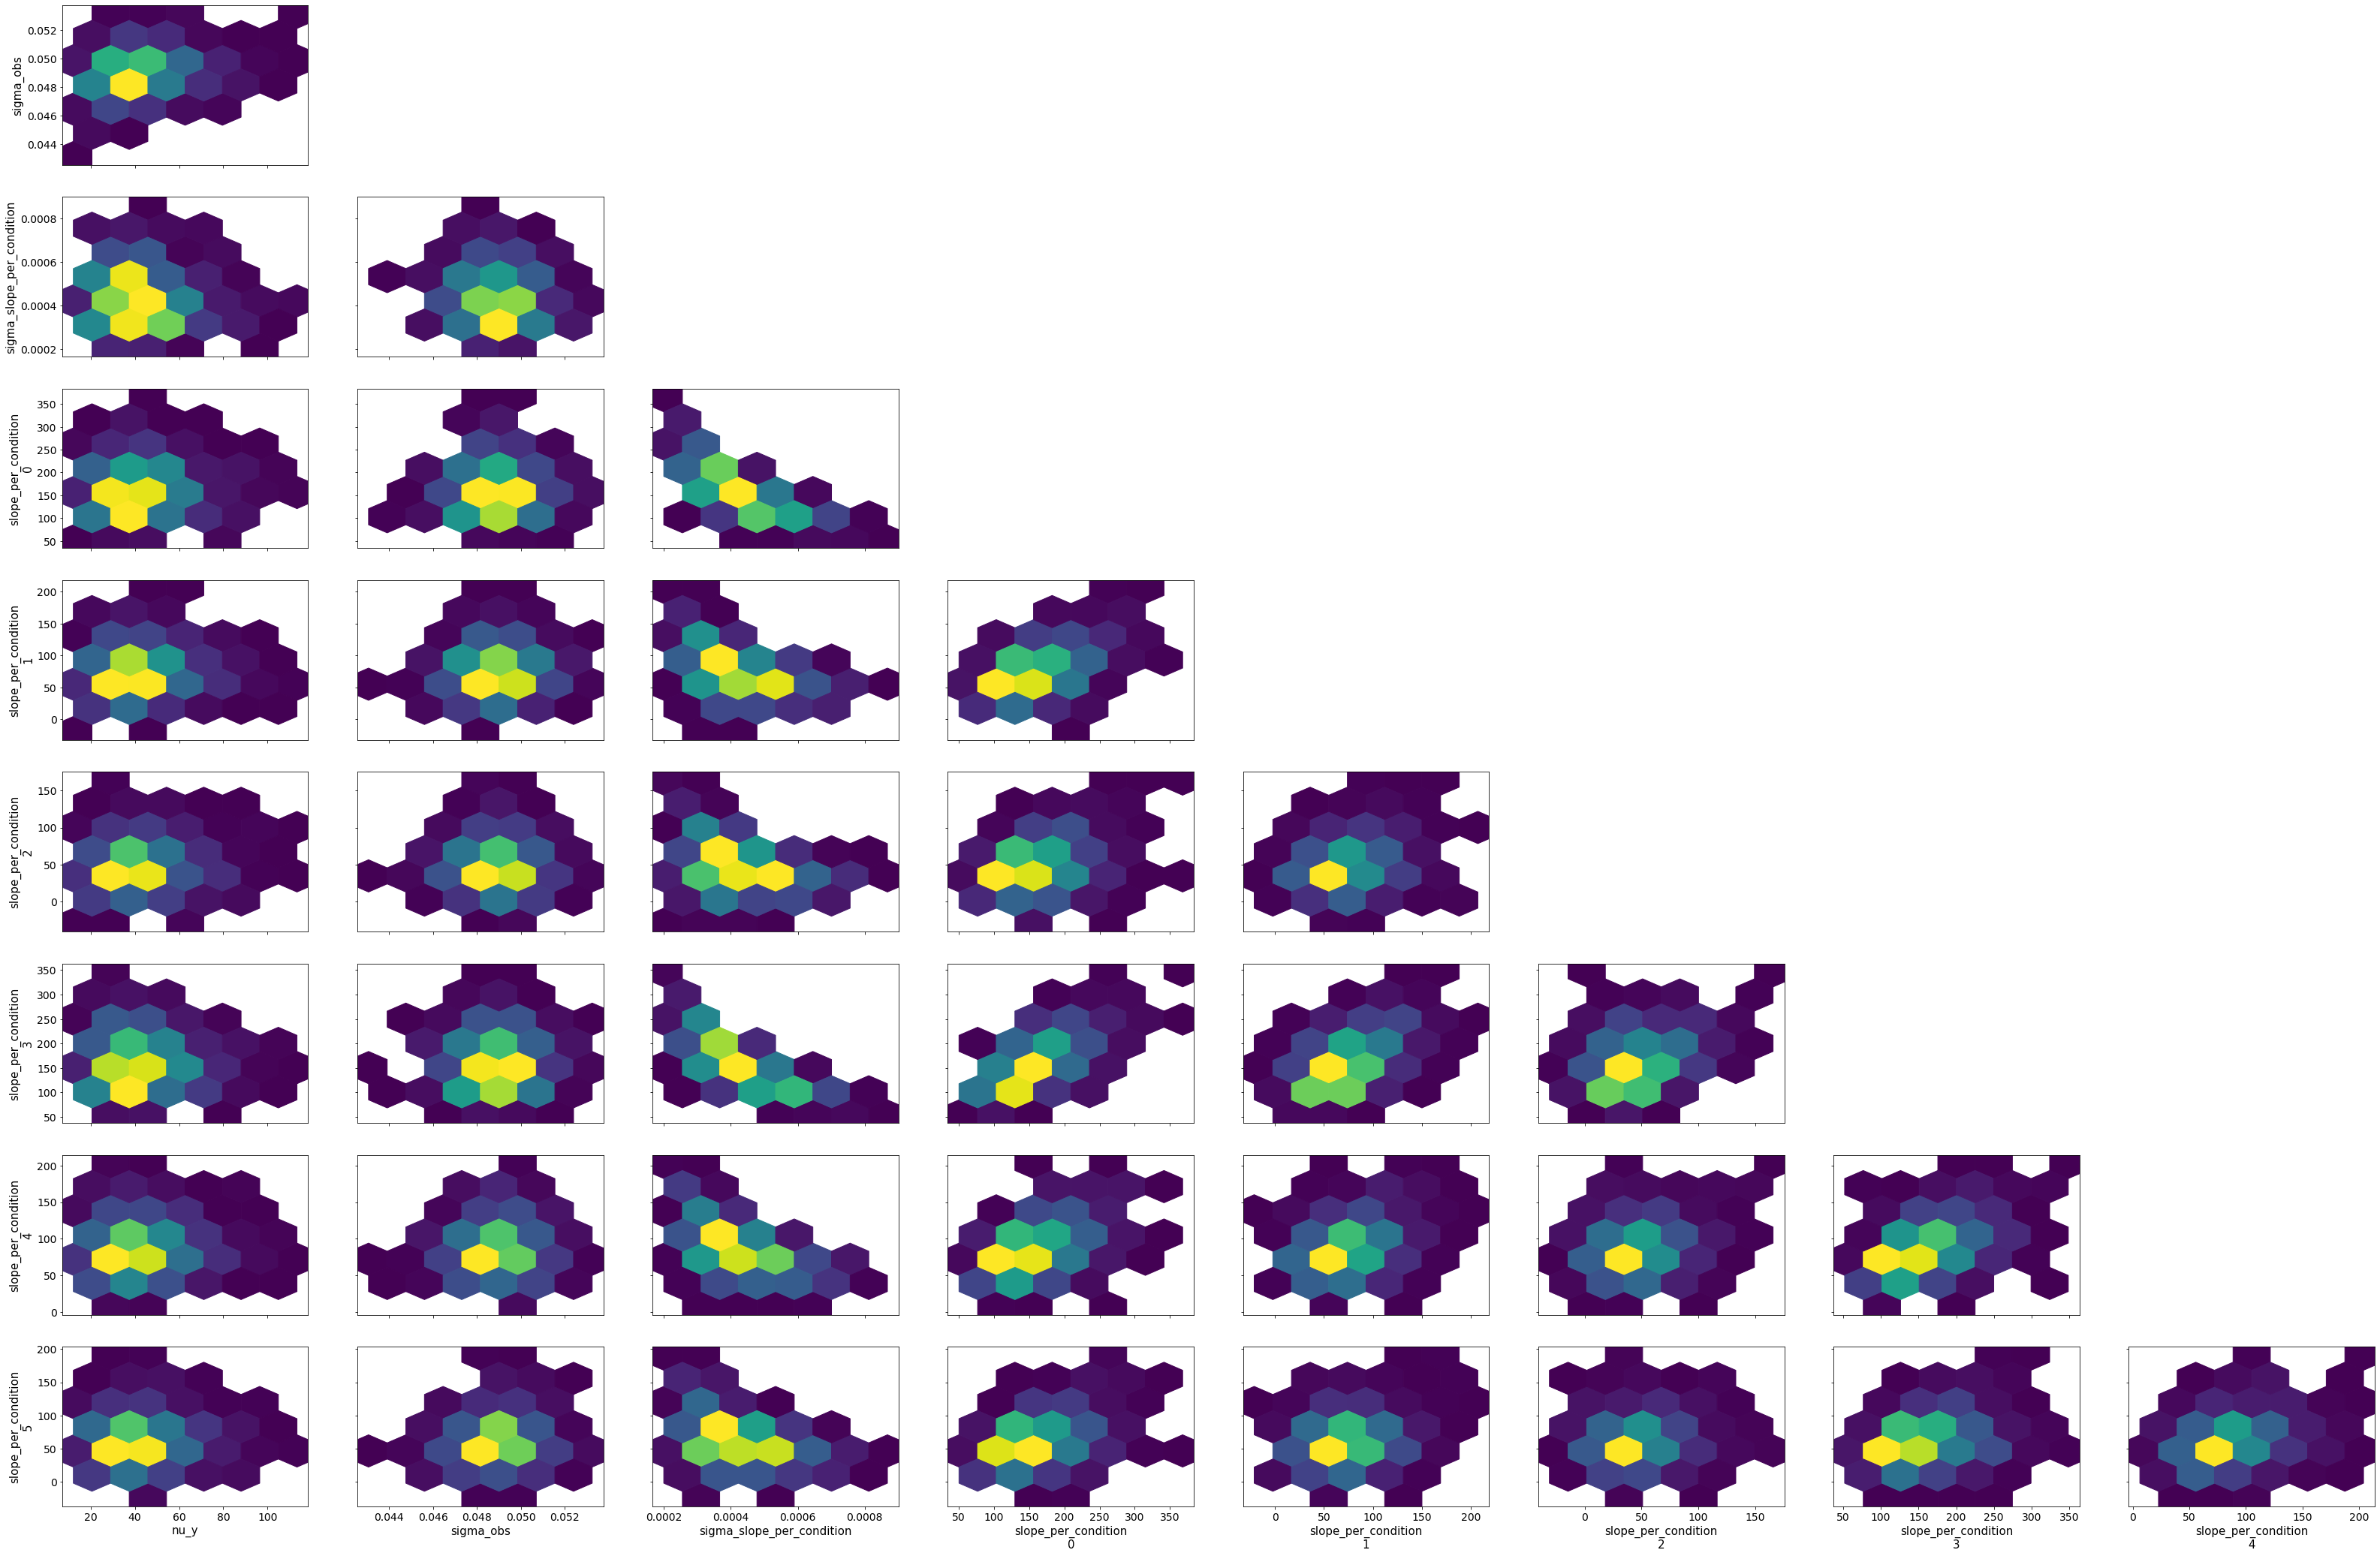

In [14]:
# Vanilla robust no interept or slope
bw = BayesRegression(df=df, y='isi', treatment='stim', condition=['neuron', 'mouse'], group='mouse')
bw.fit(model=(models.model_hierarchical),
       do_make_change='subtract',
       dist_y='student',
       robust_slopes=True,
       add_group_intercept=False,
       add_group_slope=False,
       fold_change_index_cols=('stim', 'mouse', 'neuron', 'neuron_x_mouse'))

bw.plot_model_quality()

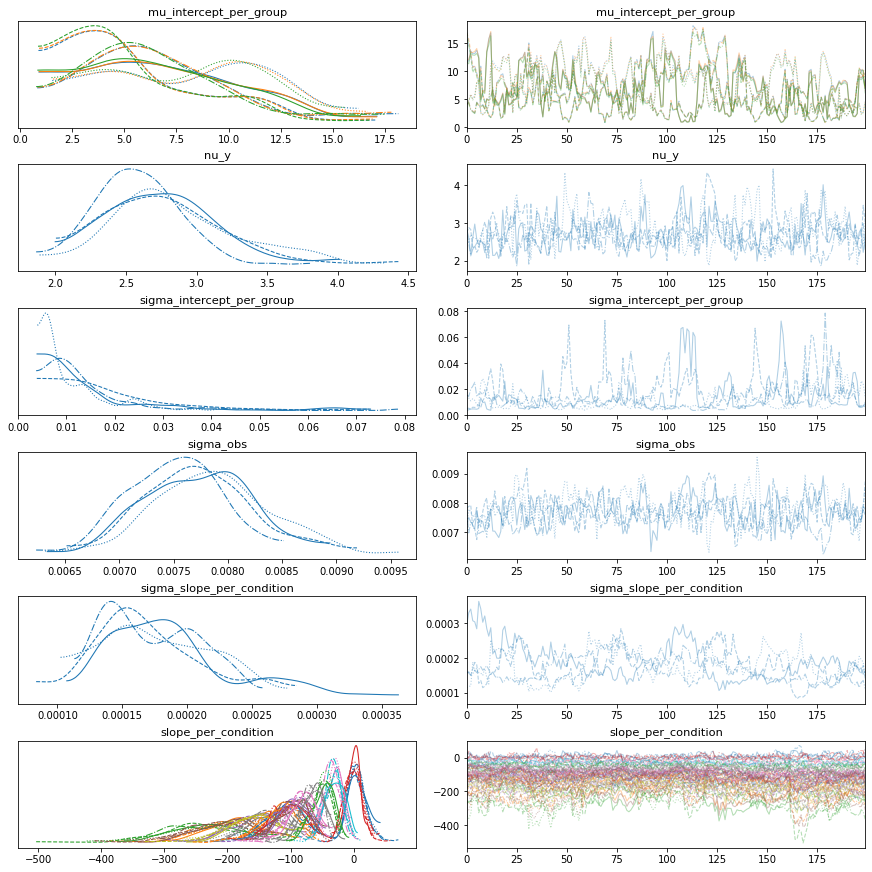

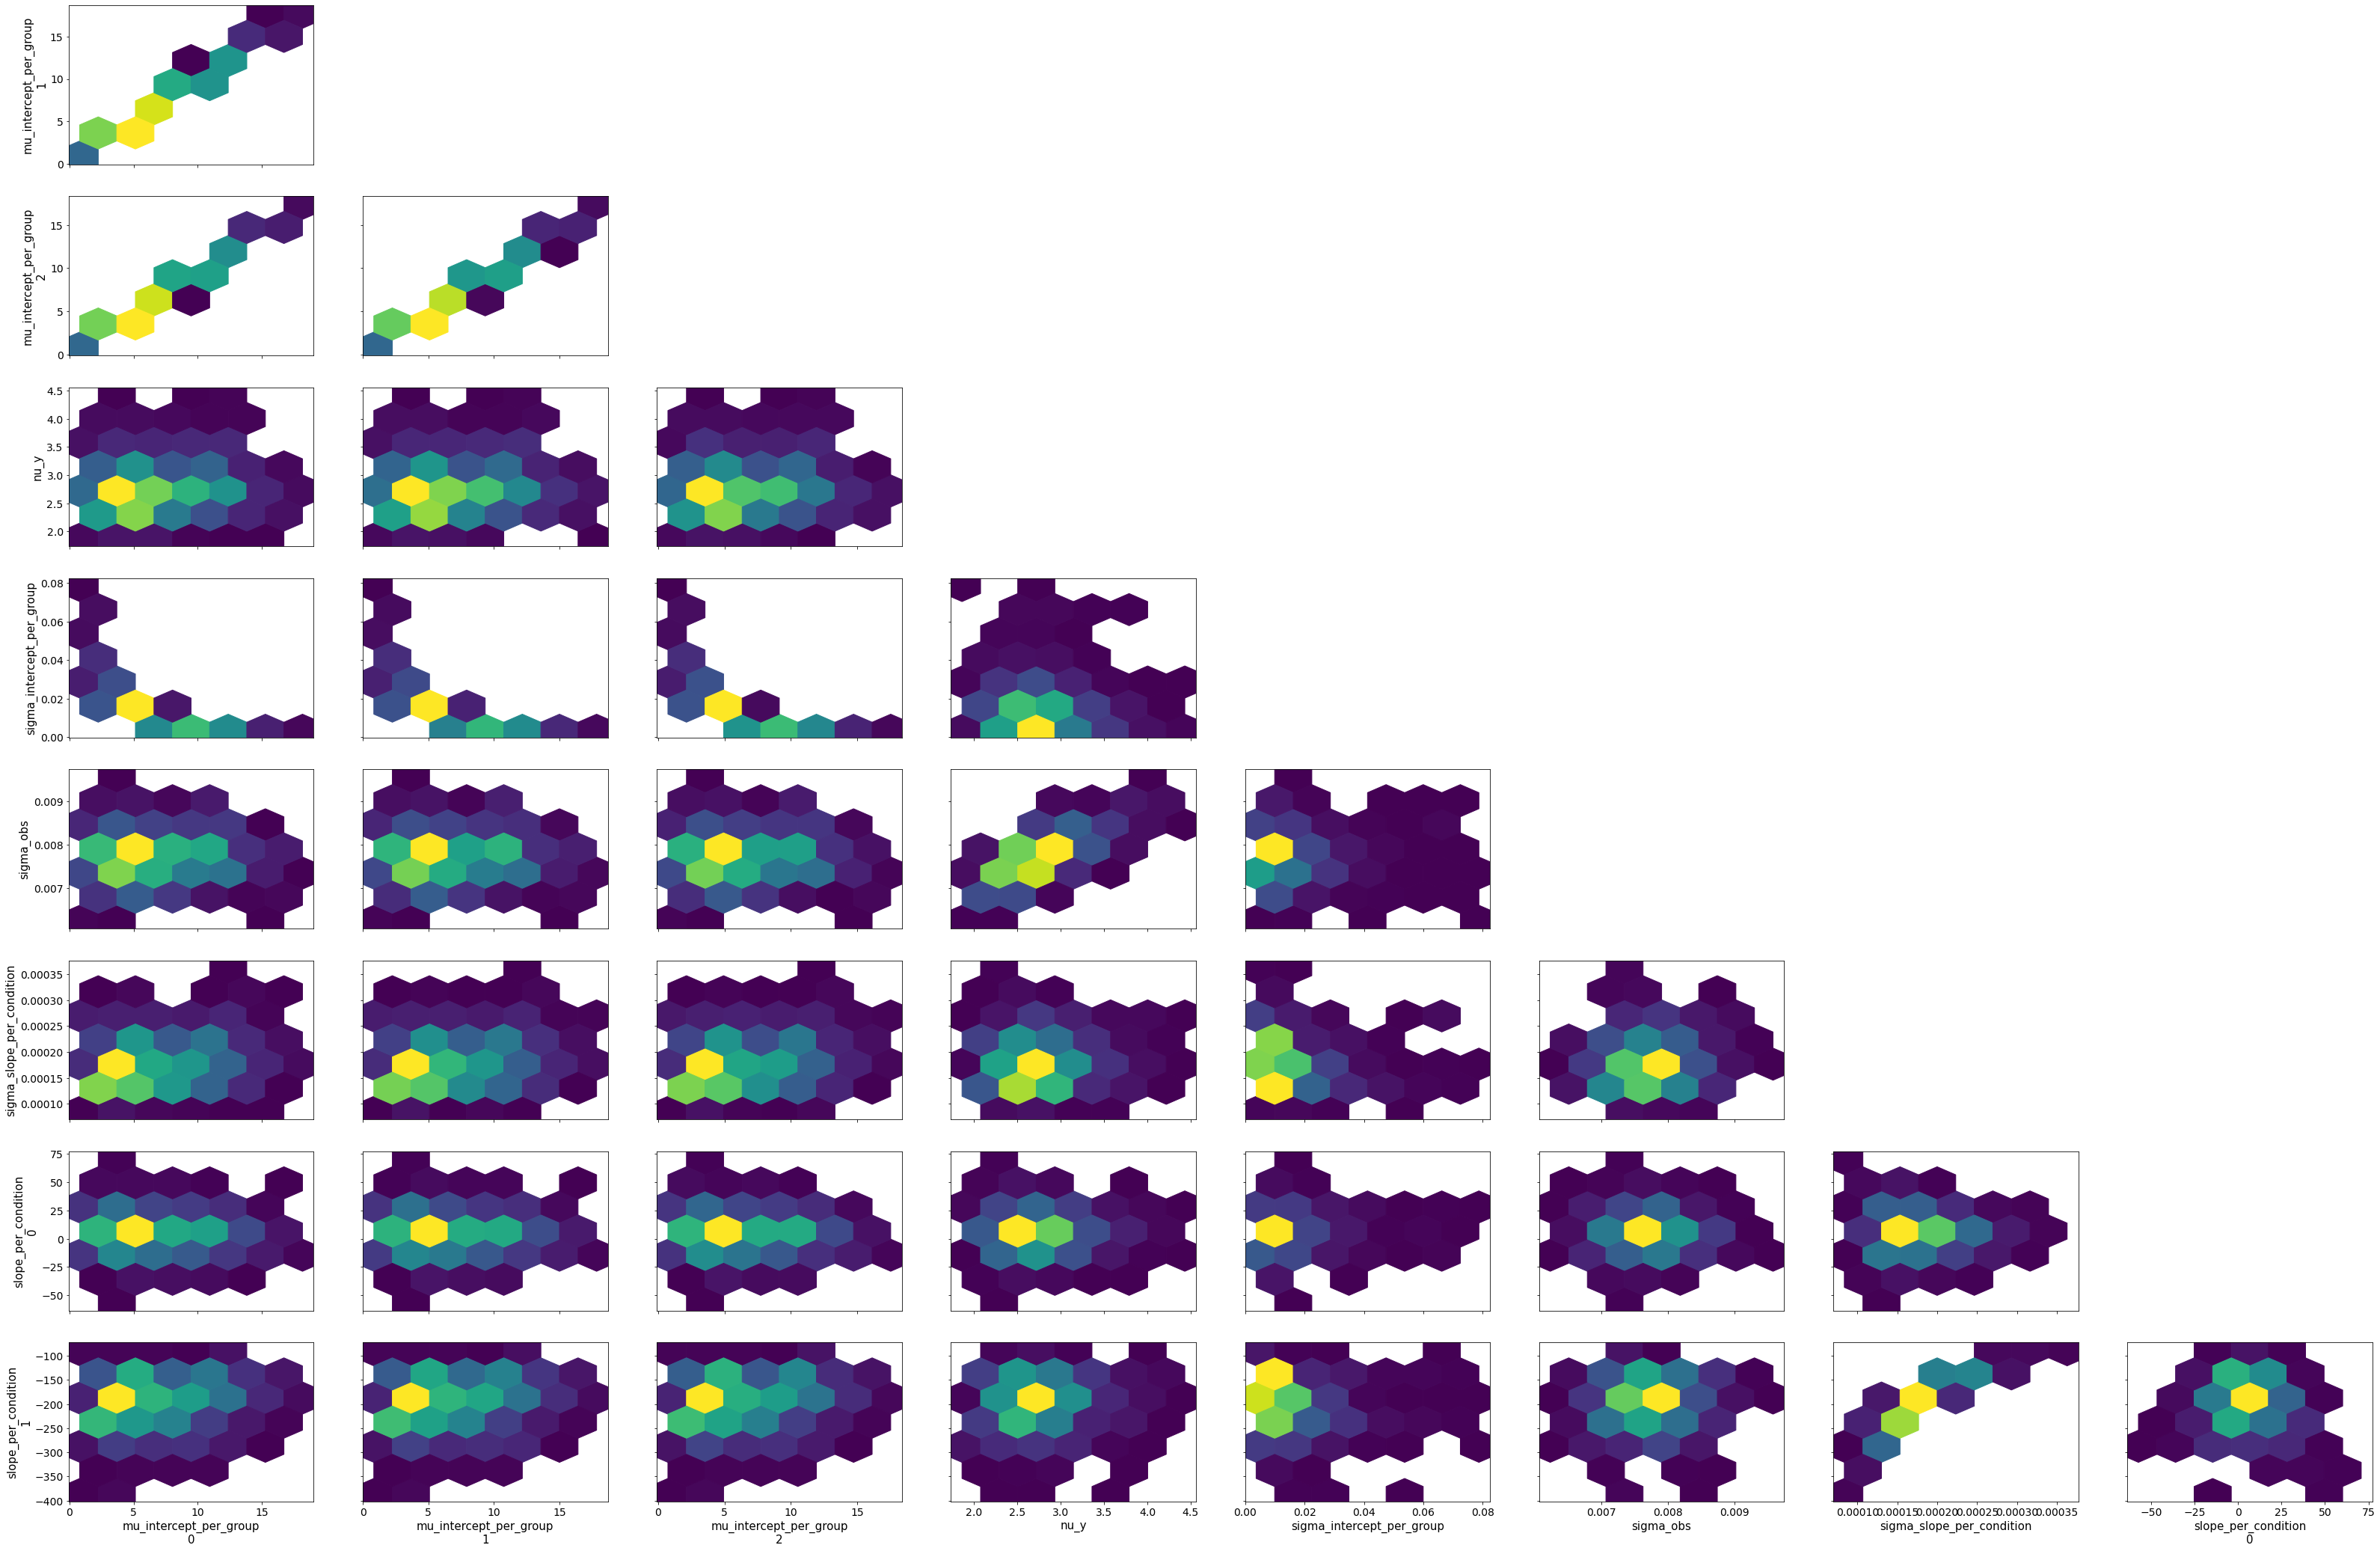

In [15]:
# Vanilla robust, intercept only
bw = BayesRegression(df=df, y='isi', treatment='stim', condition=['neuron', 'mouse'], group='mouse')
bw.fit(model=(models.model_hierarchical),
       do_make_change='subtract',
       dist_y='student',
       robust_slopes=True,
       add_group_intercept=True,
       add_group_slope=False,
       fold_change_index_cols=('stim', 'mouse', 'neuron', 'neuron_x_mouse'))

bw.plot_model_quality()

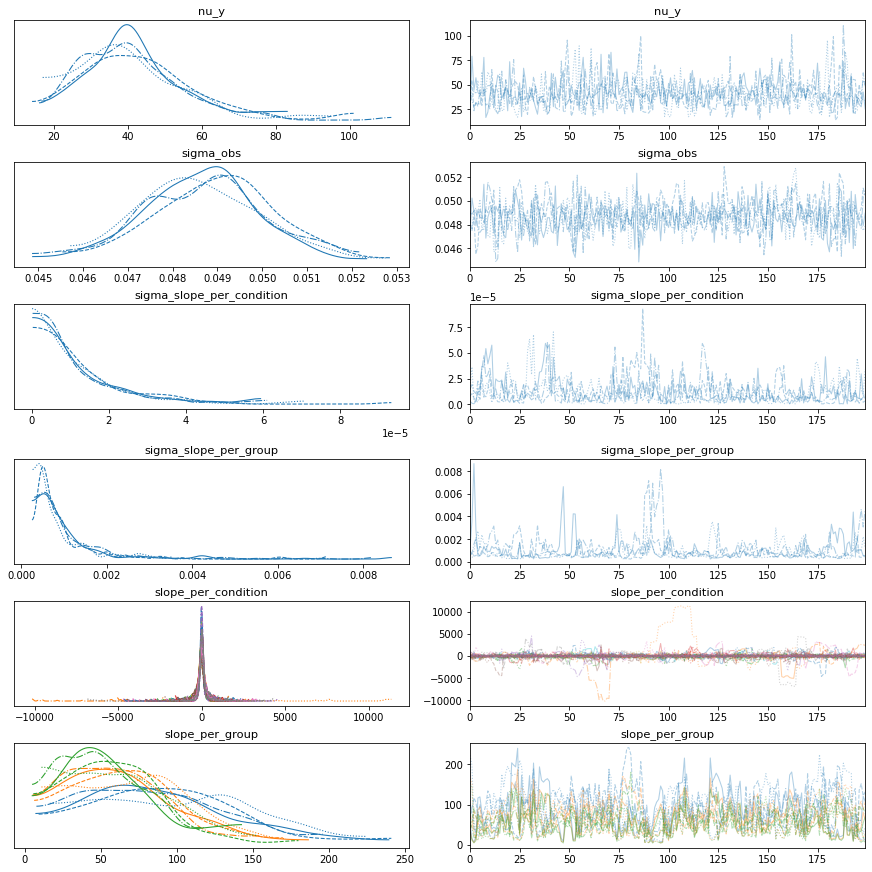

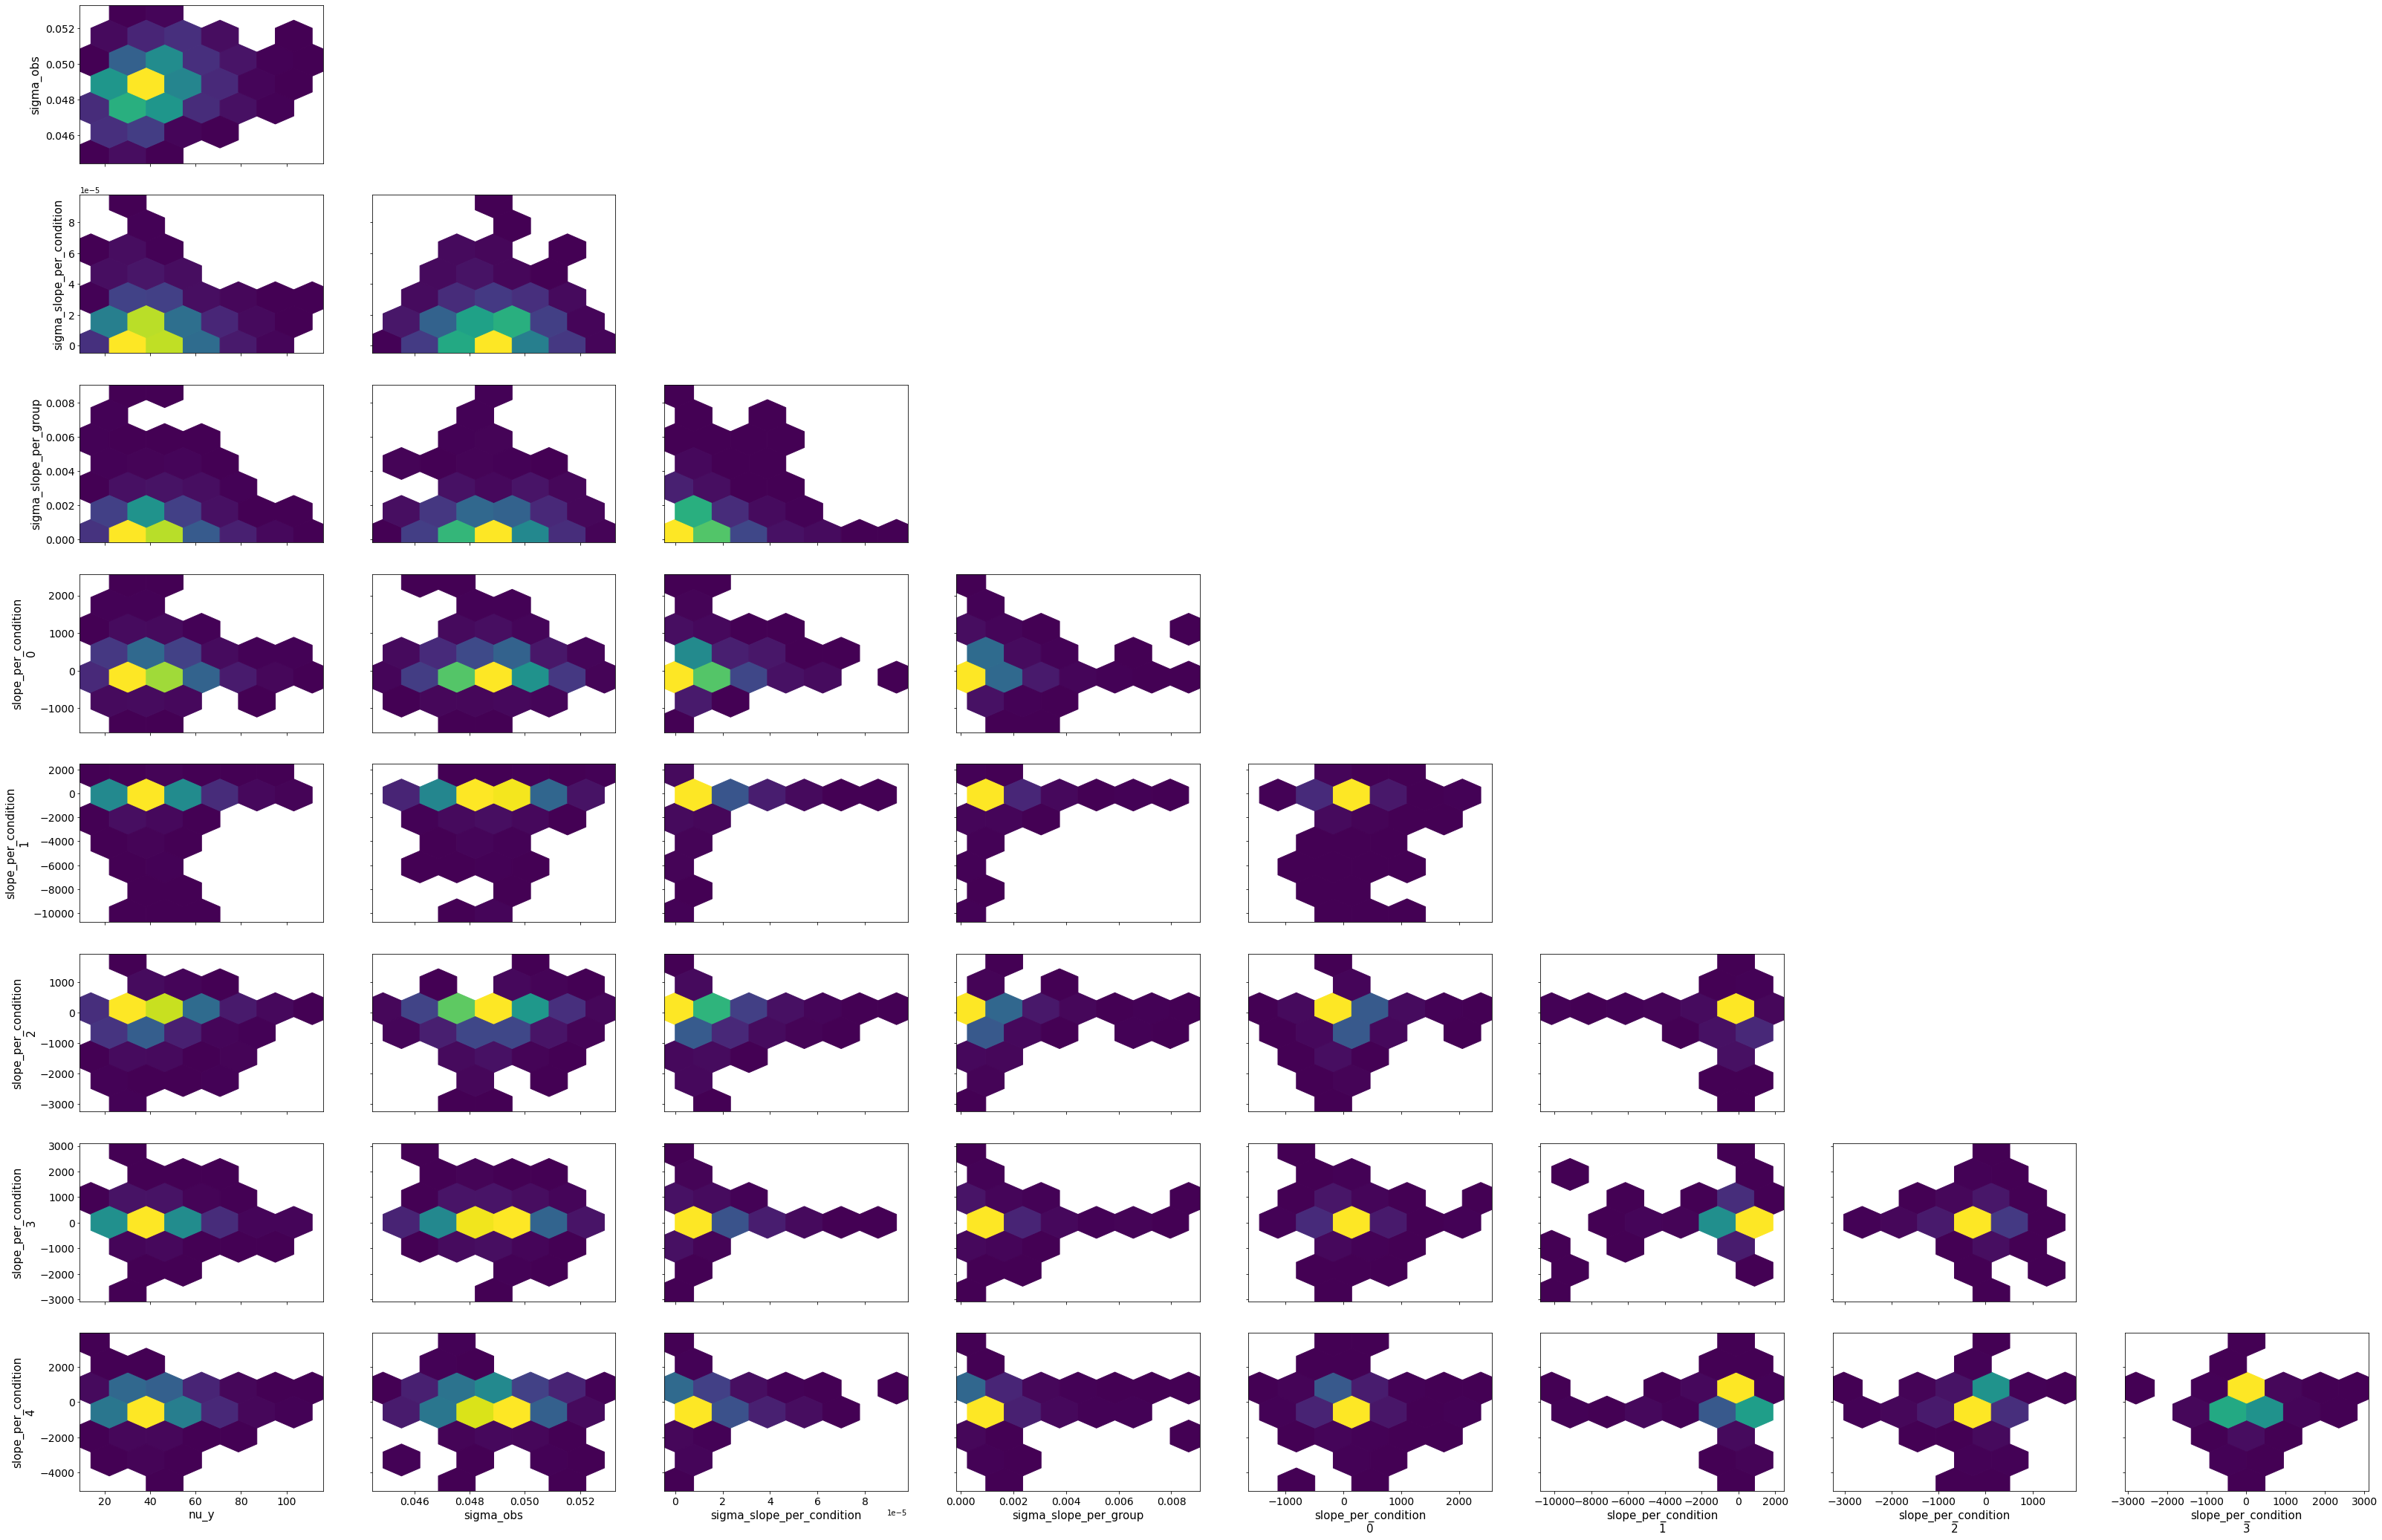

In [16]:
# Vanilla robust, slopes only
bw = BayesRegression(df=df, y='isi', treatment='stim', condition=['neuron', 'mouse'], group='mouse')
bw.fit(model=(models.model_hierarchical),
       do_make_change='subtract',
       dist_y='student',
       robust_slopes=True,
       add_group_intercept=False,
       add_group_slope=True,
       fold_change_index_cols=('stim', 'mouse', 'neuron', 'neuron_x_mouse'))

bw.plot_model_quality()

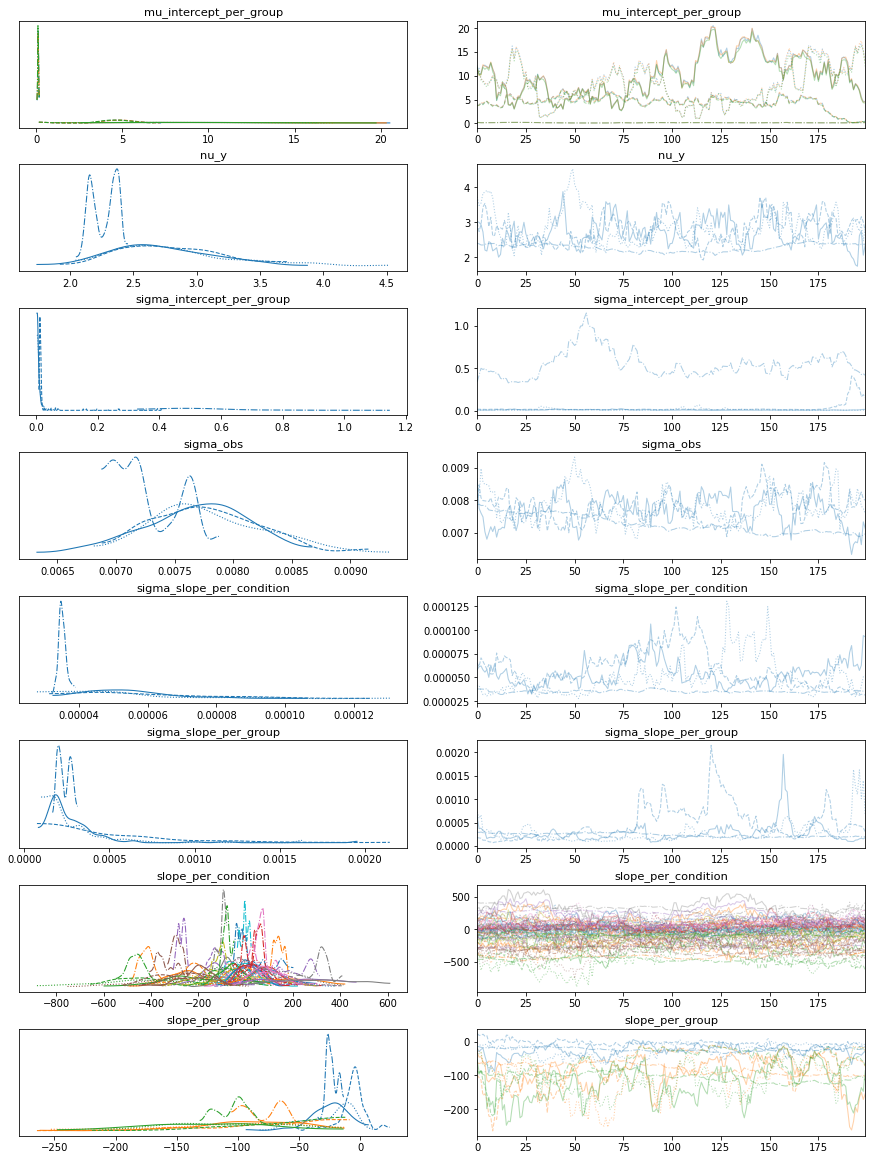

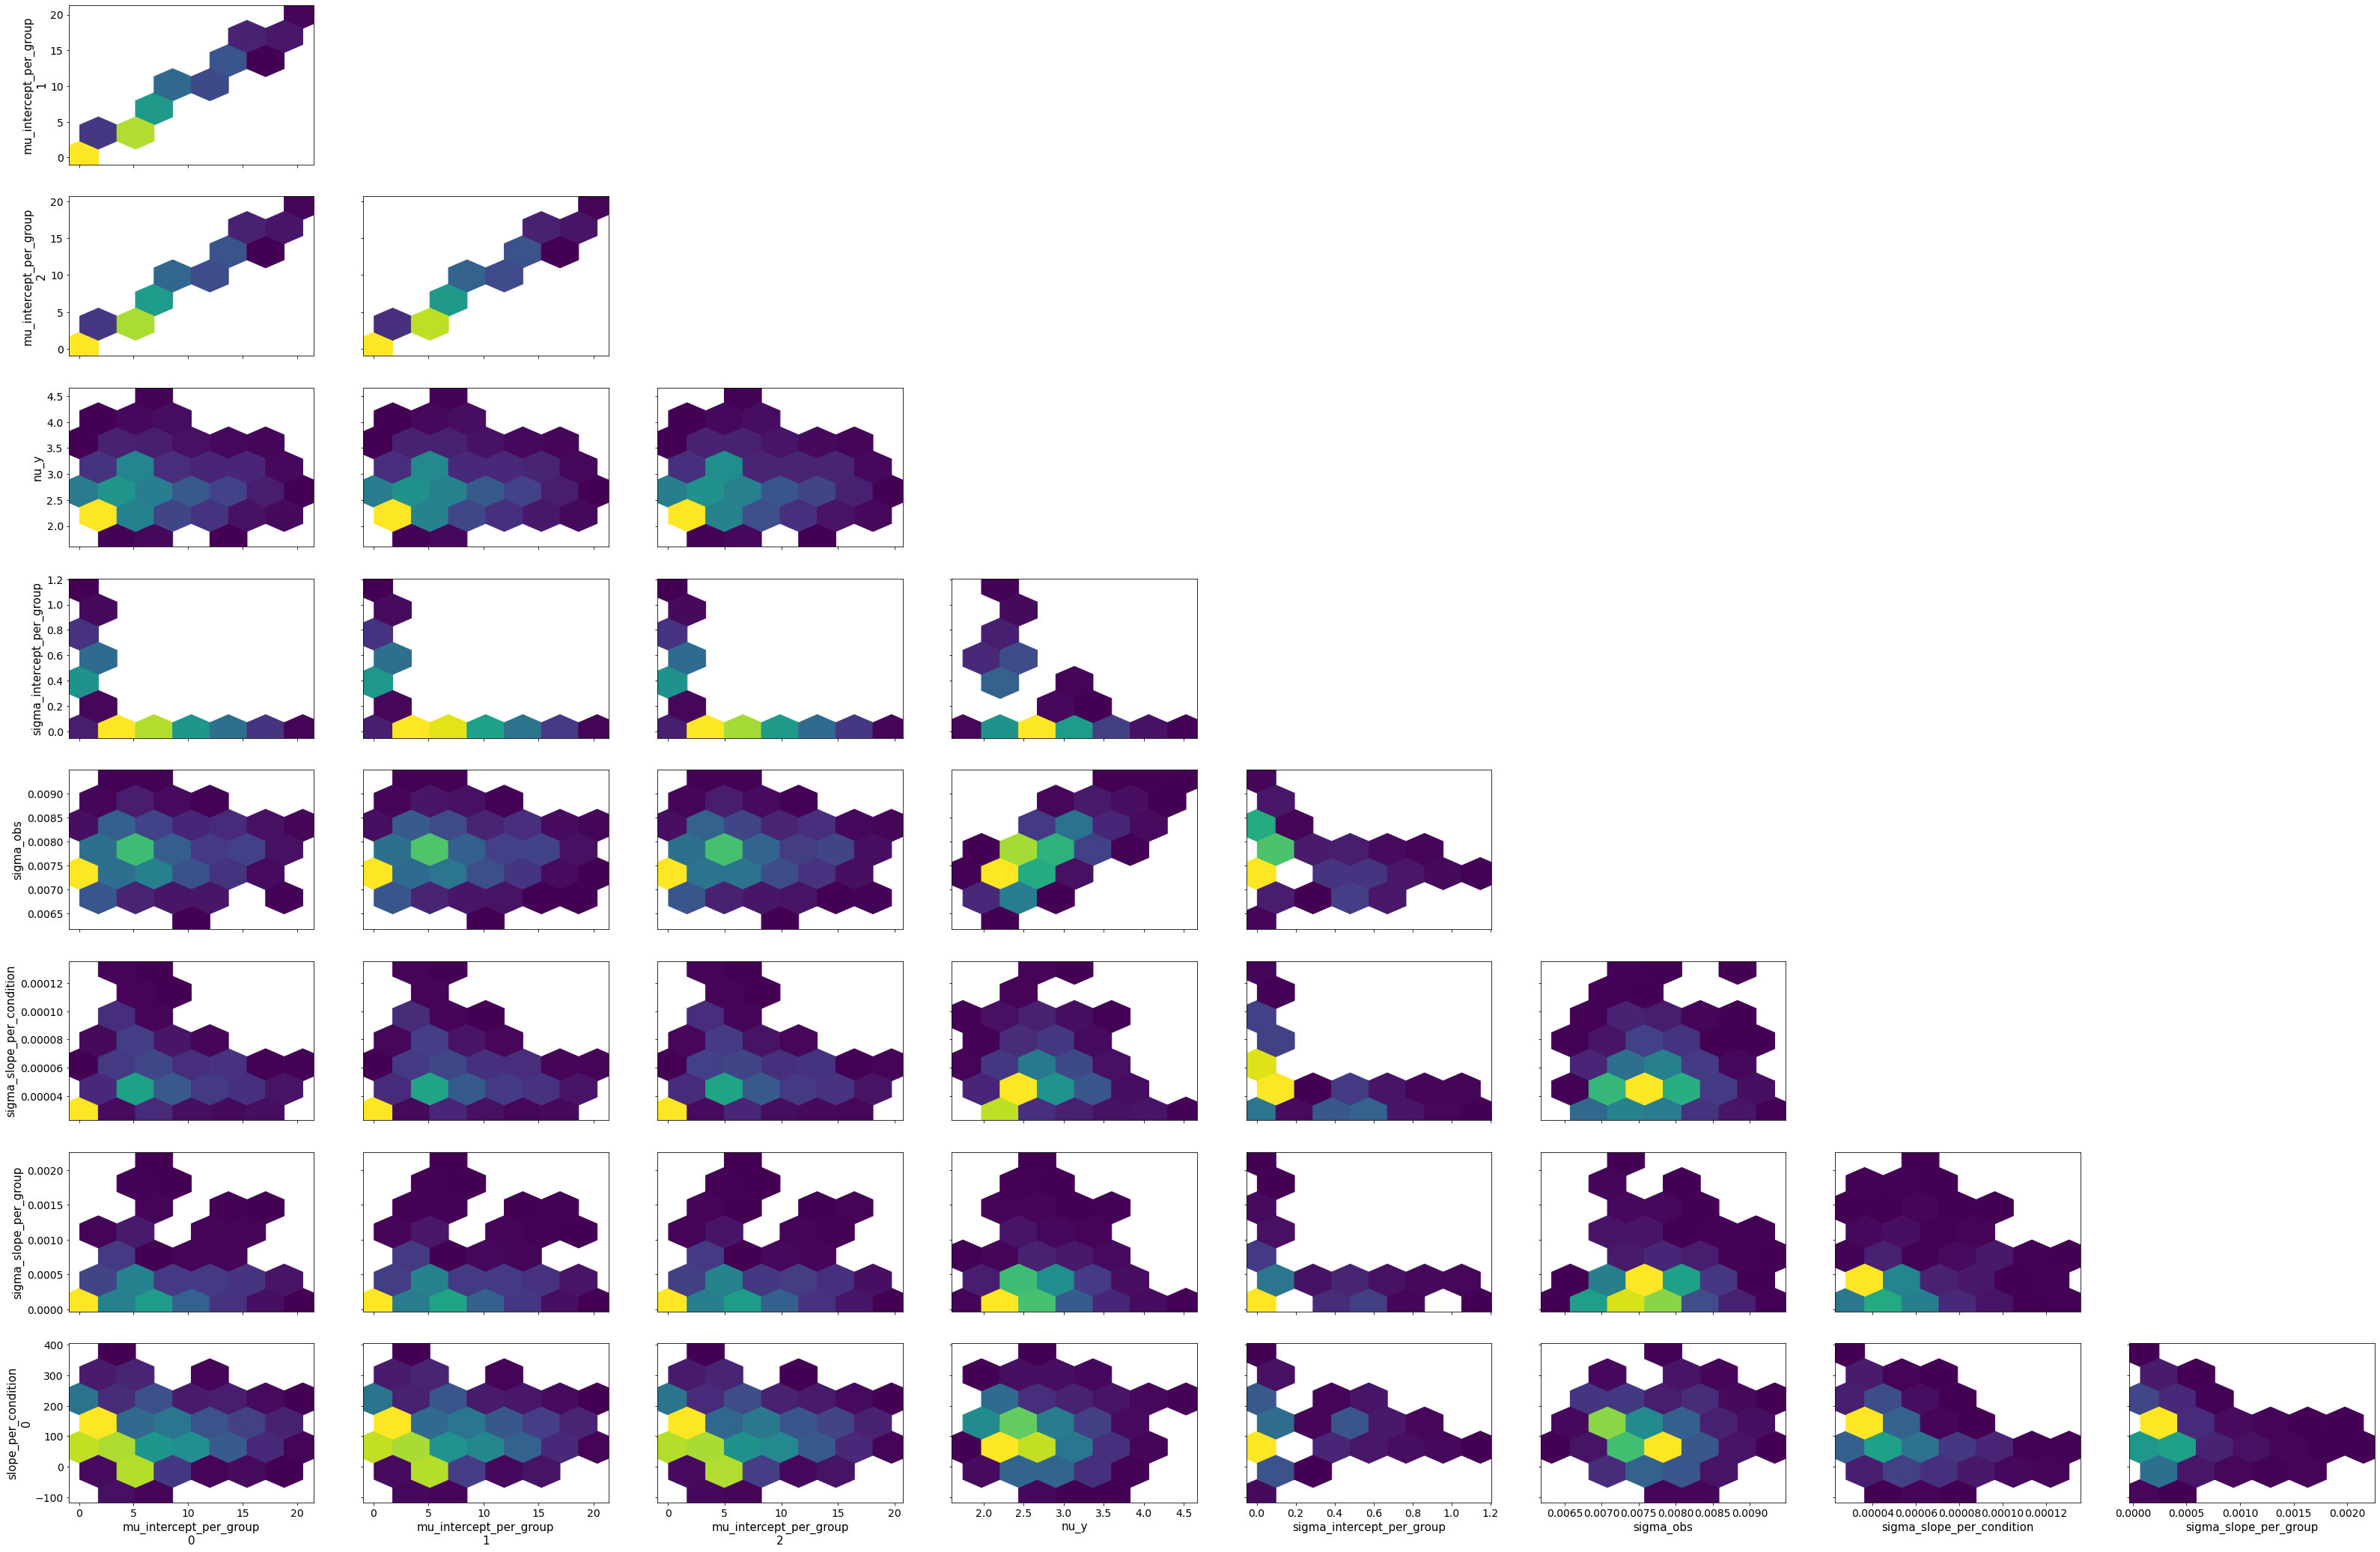

In [17]:
# Vanilla robust intercept and group
bw = BayesRegression(df=df, y='isi', treatment='stim', condition=['neuron', 'mouse'], group='mouse')
bw.fit(model=(models.model_hierarchical),
       do_make_change='subtract',
       dist_y='student',
       robust_slopes=True,
       add_group_intercept=True,
       add_group_slope=True,
       fold_change_index_cols=('stim', 'mouse', 'neuron', 'neuron_x_mouse'))

bw.plot_model_quality()

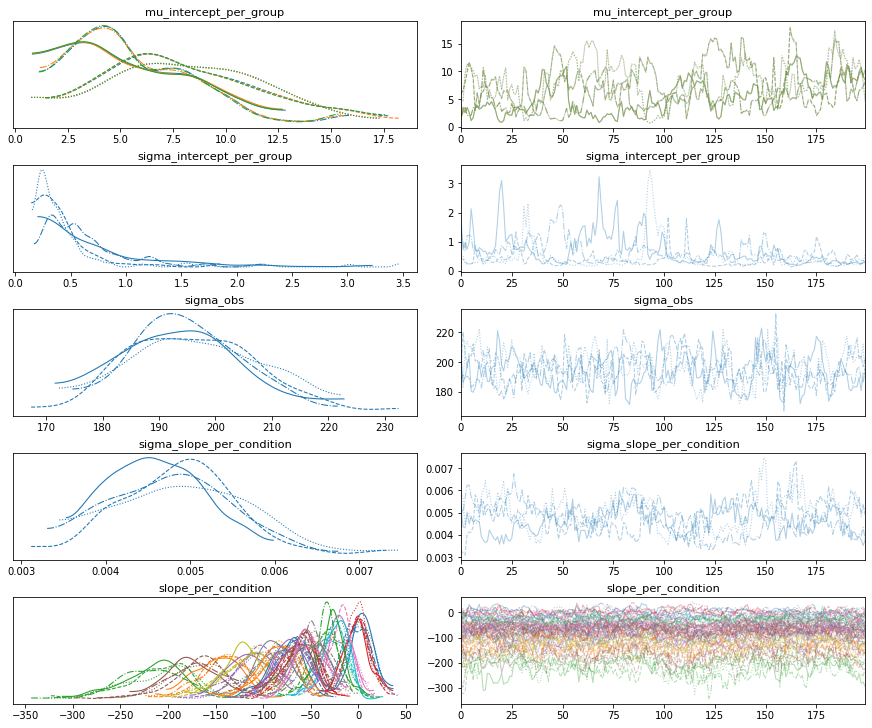

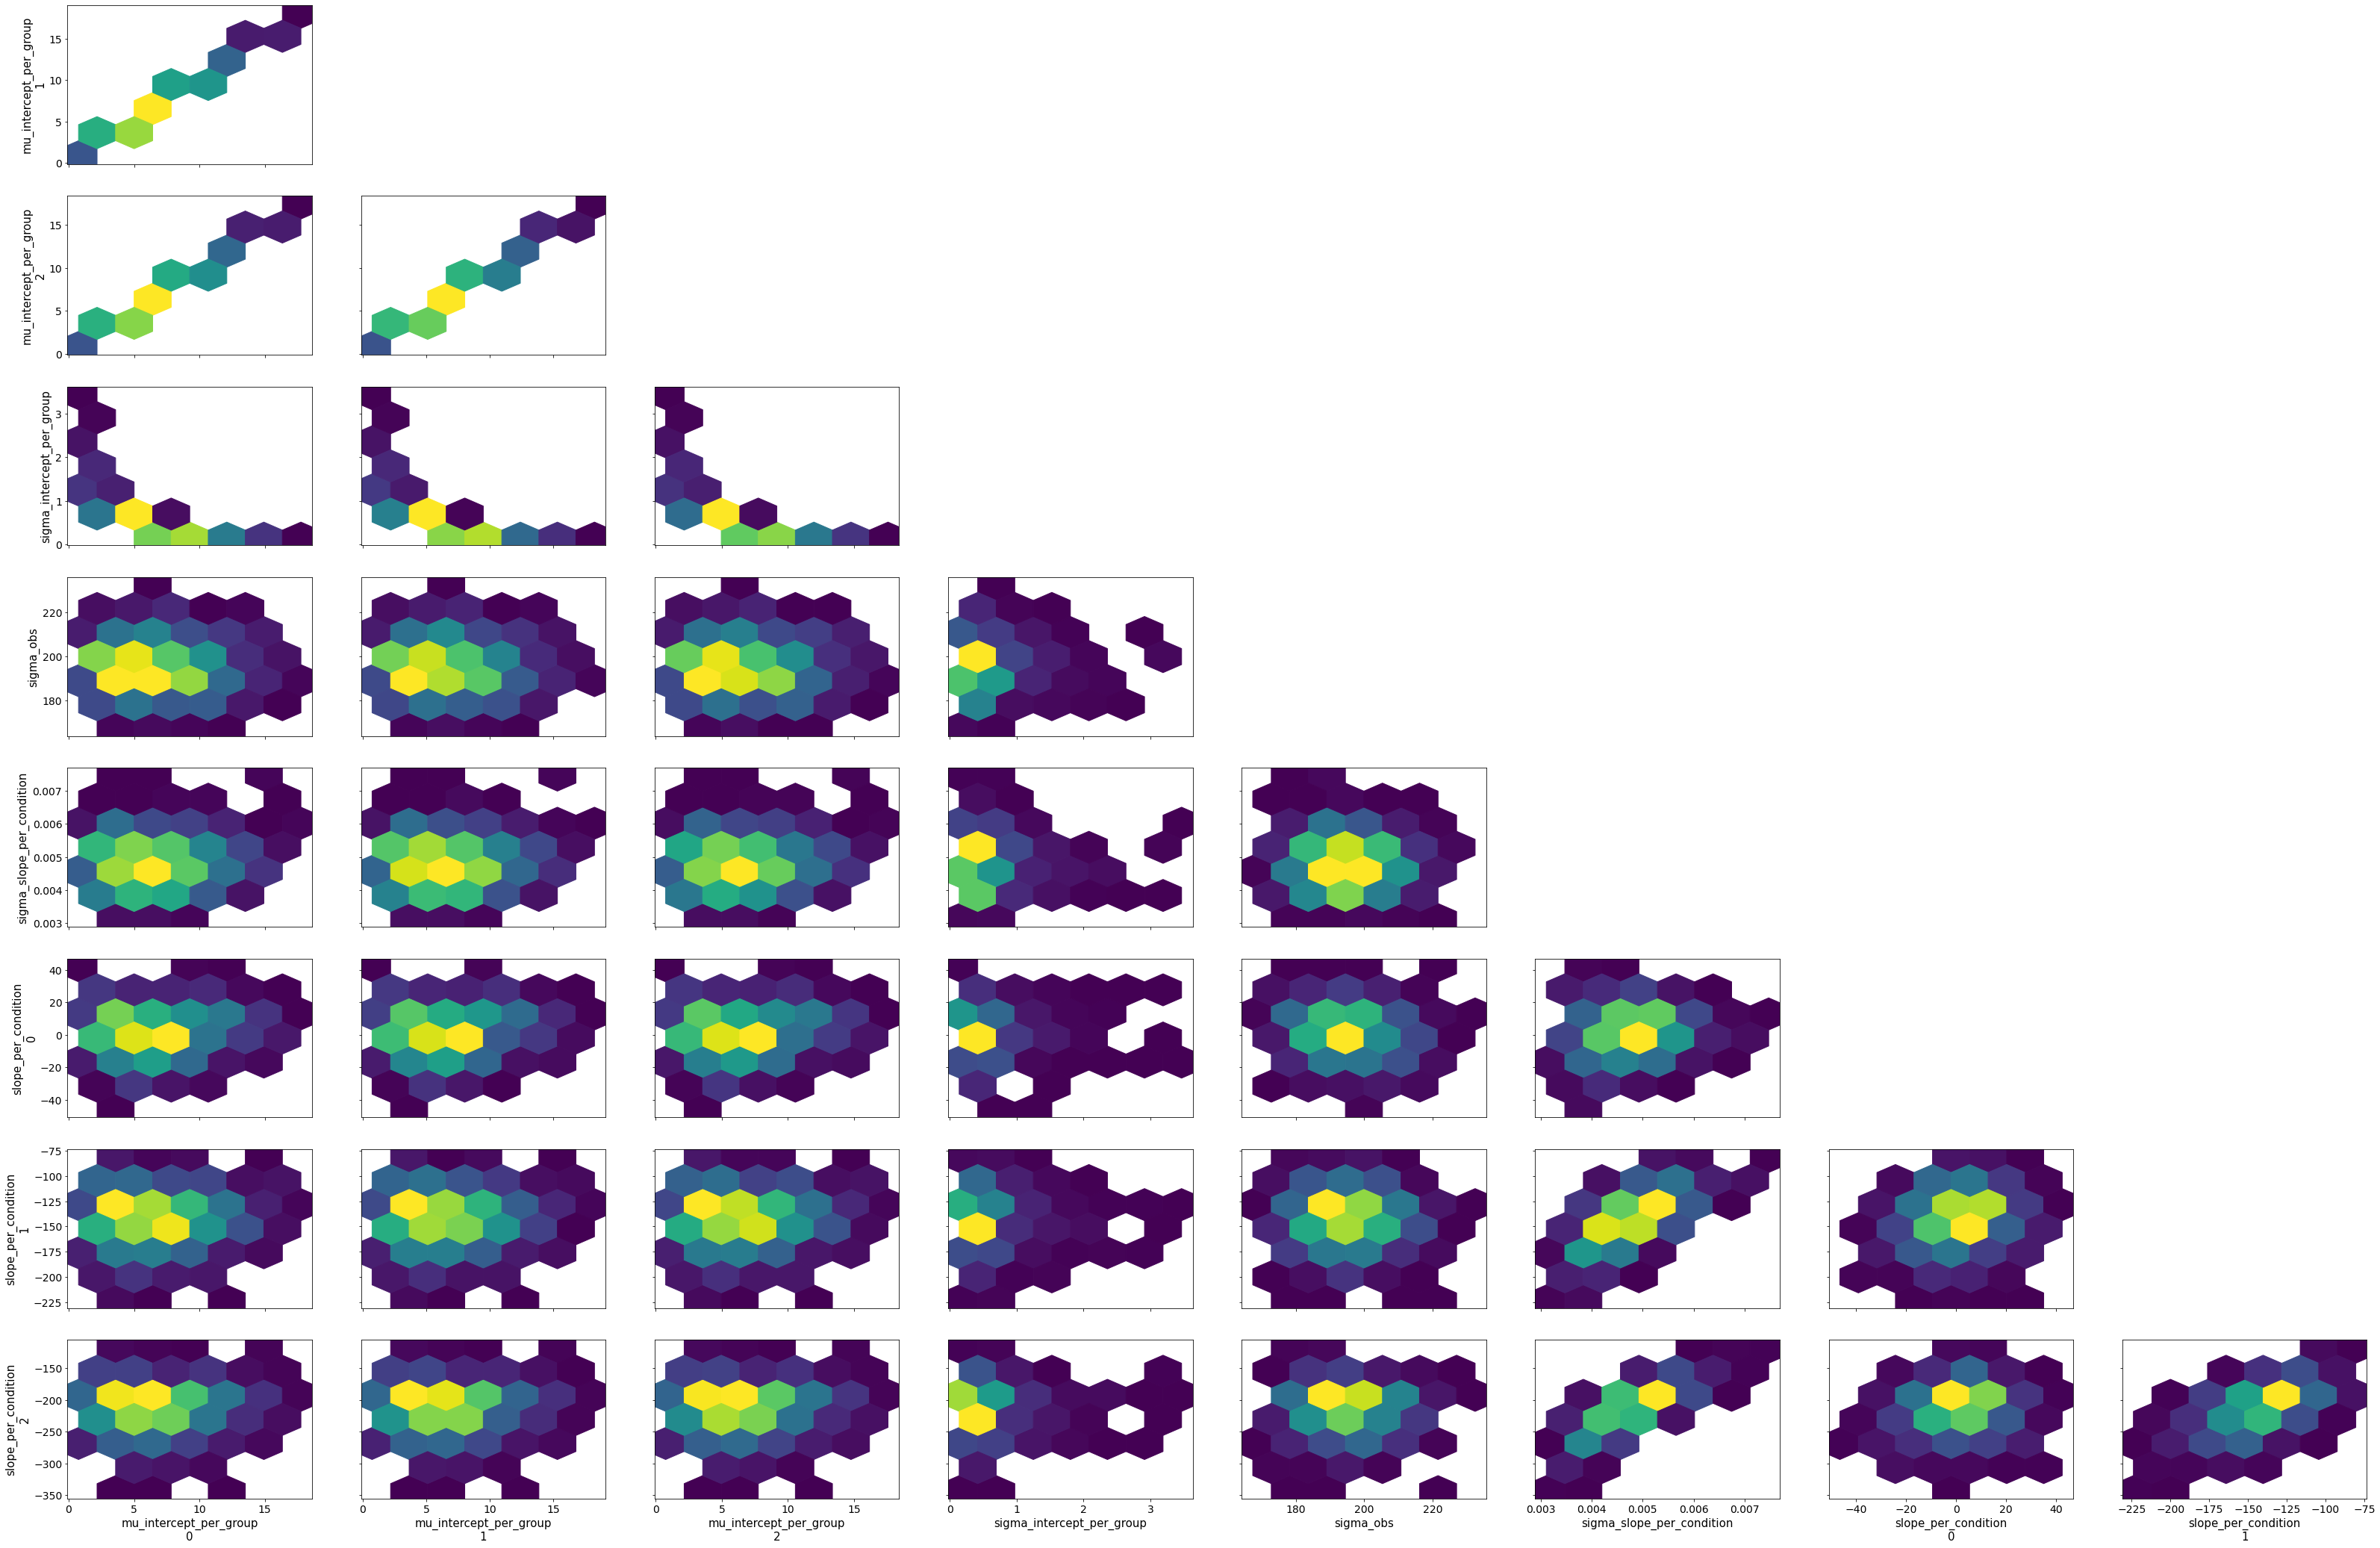

In [18]:
# Gamma GLM intercept only
bw = BayesRegression(df=df, y='isi', treatment='stim', condition=['neuron', 'mouse'], group='mouse')
bw.fit(model=(models.model_hierarchical),
       do_make_change='subtract',
       dist_y='gamma',
       robust_slopes=False,
       add_group_intercept=True,
       add_group_slope=False,
       fold_change_index_cols=('stim', 'mouse', 'neuron', 'neuron_x_mouse'))

bw.plot_model_quality()

In [19]:
bw = LMERegression(df=df, y='isi', treatment='stim', condition=['neuron_x_mouse'], group='mouse', )
bw.fit(add_data=False, add_group_intercept=True, add_group_slope=False)

Using formula isi ~ (1|mouse) + stim| neuron_x_mouse__0 + stim|neuron_x_mouse__1 + stim|neuron_x_mouse__2 + stim|neuron_x_mouse__3 + stim|neuron_x_mouse__4 + stim|neuron_x_mouse__5 + stim|neuron_x_mouse__6 + stim|neuron_x_mouse__7 + stim|neuron_x_mouse__8 + stim|neuron_x_mouse__9 + stim|neuron_x_mouse__10 + stim|neuron_x_mouse__11 + stim|neuron_x_mouse__12 + stim|neuron_x_mouse__13 + stim|neuron_x_mouse__14 + stim|neuron_x_mouse__15 + stim|neuron_x_mouse__16 + stim|neuron_x_mouse__17
                            Coef. Std.Err.        z  P>|z|  [0.025  0.975]
Intercept                   0.080    0.014    5.798  0.000   0.053   0.107
1 | mouse                  -0.007    0.007   -0.975  0.329  -0.021   0.007
stim | neuron_x_mouse__0    0.004    0.002    1.873  0.061  -0.000   0.009
stim | neuron_x_mouse__1   -0.001    0.002   -0.617  0.537  -0.006   0.003
stim | neuron_x_mouse__2   -0.014    0.002   -5.848  0.000  -0.018  -0.009
stim | neuron_x_mouse__3   -0.016    0.002   -6.668  0.000  -

/home/m/env_jb1/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


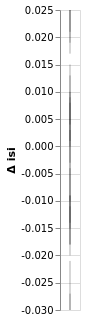

'Proper faceting will work when data addition is implemented in fit_lme()'

In [20]:
bw.chart.display()
#bw.facet(column='mouse').display()
"Proper faceting will work when data addition is implemented in fit_lme()"

In [21]:
bw = LMERegression(df=df, y='isi', treatment='stim', condition=['neuron_x_mouse'], group='mouse', )
bw.fit(add_data=False, add_group_intercept=True, add_group_slope=True)

Using formula isi ~ (stim|mouse)  + stim| neuron_x_mouse__0 + stim|neuron_x_mouse__1 + stim|neuron_x_mouse__2 + stim|neuron_x_mouse__3 + stim|neuron_x_mouse__4 + stim|neuron_x_mouse__5 + stim|neuron_x_mouse__6 + stim|neuron_x_mouse__7 + stim|neuron_x_mouse__8 + stim|neuron_x_mouse__9 + stim|neuron_x_mouse__10 + stim|neuron_x_mouse__11 + stim|neuron_x_mouse__12 + stim|neuron_x_mouse__13 + stim|neuron_x_mouse__14 + stim|neuron_x_mouse__15 + stim|neuron_x_mouse__16 + stim|neuron_x_mouse__17
                            Coef. Std.Err.        z  P>|z|  [0.025  0.975]
Intercept                   0.075    0.010    7.736  0.000   0.056   0.094
stim | mouse               -0.007    0.007   -0.975  0.329  -0.021   0.007
stim | neuron_x_mouse__0    0.002    0.003    0.734  0.463  -0.004   0.009
stim | neuron_x_mouse__1   -0.004    0.003   -1.104  0.270  -0.010   0.003
stim | neuron_x_mouse__2   -0.016    0.003   -4.966  0.000  -0.022  -0.010
stim | neuron_x_mouse__3   -0.018    0.003   -5.572  0.00

/home/m/env_jb1/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


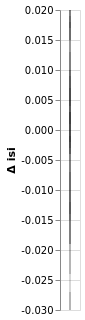

In [22]:
bw.chart

In [23]:
bw = LMERegression(df=df, y='isi', treatment='stim', condition=['neuron_x_mouse'], group='mouse', )
try:
    bw.fit(add_data=False, add_group_intercept=True, add_group_slope=True, add_nested_group=True)
except Exception as e:
    print(e)



Using formula isi ~ (stim|mouse) + stim| neuron_x_mouse__0:mouse + stim|neuron_x_mouse__1:mouse + stim|neuron_x_mouse__2:mouse + stim|neuron_x_mouse__3:mouse + stim|neuron_x_mouse__4:mouse + stim|neuron_x_mouse__5:mouse + stim|neuron_x_mouse__6:mouse + stim|neuron_x_mouse__7:mouse + stim|neuron_x_mouse__8:mouse + stim|neuron_x_mouse__9:mouse + stim|neuron_x_mouse__10:mouse + stim|neuron_x_mouse__11:mouse + stim|neuron_x_mouse__12:mouse + stim|neuron_x_mouse__13:mouse + stim|neuron_x_mouse__14:mouse + stim|neuron_x_mouse__15:mouse + stim|neuron_x_mouse__16:mouse + stim|neuron_x_mouse__17:mouse
Singular matrix
